In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.dates as mdates

# 한글 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# 1. 데이터 로드 (사용자에 맞게 수정)
url = "AAME.csv"
df = pd.read_csv(url, parse_dates=['Date'], index_col='Date')  # Date 컬럼이 있어야 함

print("초기 데이터 샘플:")
print(df.head())
print("\n데이터 정보:")
print(df.info())

초기 데이터 샘플:
            Open  High   Low  Close  Adj Close  Volume
Date                                                  
1980-03-17   0.0  4.05  3.85   3.85   3.213167   15000
1980-03-18   0.0  4.00  3.80   3.80   3.171437   10200
1980-03-19   0.0  4.05  3.85   3.85   3.213167   33500
1980-03-20   0.0  4.00  3.80   3.80   3.171437    8700
1980-03-21   0.0  3.95  3.75   3.75   3.129709   12700

데이터 정보:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10098 entries, 1980-03-17 to 2020-04-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10098 non-null  float64
 1   High       10098 non-null  float64
 2   Low        10098 non-null  float64
 3   Close      10098 non-null  float64
 4   Adj Close  10098 non-null  float64
 5   Volume     10098 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 552.2 KB
None


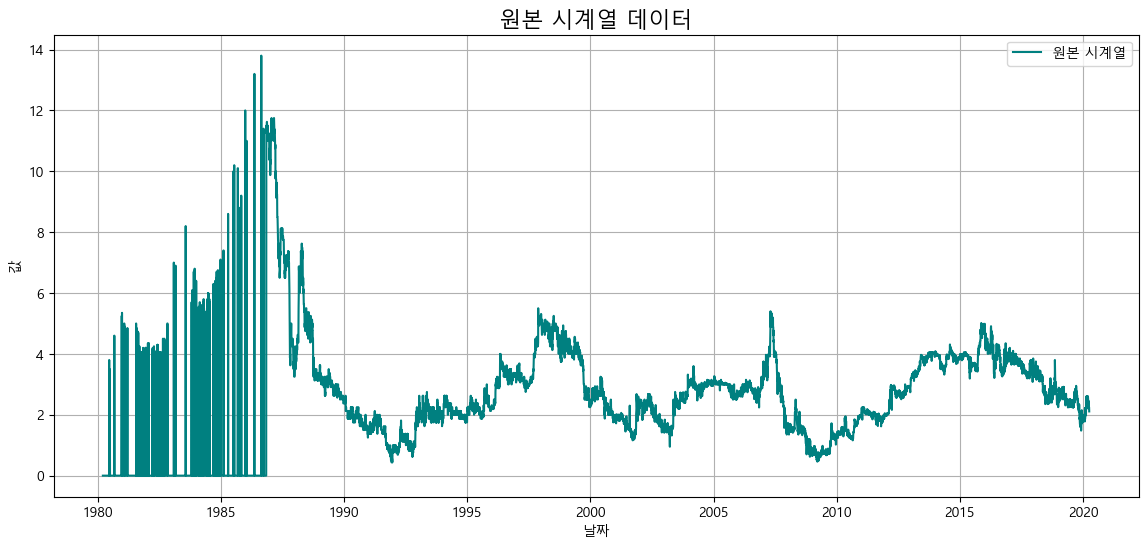

In [3]:
# 2. 시각화
plt.figure(figsize=(14,6))
plt.plot(df.index, df['Open'], label='원본 시계열', color='teal')
plt.title('원본 시계열 데이터', fontsize=16)
plt.xlabel('날짜')
plt.ylabel('값')
plt.grid(True)
plt.legend()
plt.show()

In [4]:
# 3. 전처리
data = df['Open'].values.reshape(-1, 1)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

def create_dataset(data, time_step=60):
    X, y, dates = [], [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:i+time_step, 0])
        y.append(data[i+time_step, 0])
        dates.append(df.index[i+time_step])
    return np.array(X), np.array(y), np.array(dates)

time_step = 60
X, y, dates = create_dataset(scaled_data, time_step)

In [5]:
# 4. 학습/테스트 분리
train_size = int(len(X)*0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
test_dates = dates[train_size:]

X_train = X_train.reshape(X_train.shape[0], time_step, 1)
X_test = X_test.reshape(X_test.shape[0], time_step, 1)

In [6]:
# 5. 모델 구성
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.3),
    SimpleRNN(64, return_sequences=True),
    Dropout(0.3),
    SimpleRNN(32),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')

C:\Users\leehy\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
# 6. 모델 학습
print("\n모델 학습 중...")
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)


모델 학습 중...
Epoch 1/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 39s 154ms/step - loss: 0.2914 - val_loss: 7.8731e-04
Epoch 2/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 23s 115ms/step - loss: 0.0654 - val_loss: 4.0207e-04
Epoch 3/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 23s 114ms/step - loss: 0.0283 - val_loss: 1.8106e-04
Epoch 4/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 47s 144ms/step - loss: 0.0198 - val_loss: 1.0205e-04
Epoch 5/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 28s 136ms/step - loss: 0.0126 - val_loss: 1.1747e-04
Epoch 6/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 23s 116ms/step - loss: 0.0106 - val_loss: 2.7929e-04
Epoch 7/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 23s 113ms/step - loss: 0.0088 - val_loss: 9.4377e-05
Epoch 8/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 22s 110ms/step - loss: 0.0083 - val_loss: 8.2772e-05
Epoch 9/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 44s 123ms/step - loss: 0.0077 - val_loss: 1.7635e-04
Epoch 10/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 25s 123ms/step - loss: 0.0066 - val_loss: 2.0160e-04
Epoch 11/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 26s 1

In [8]:
# 7. 예측
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
y_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step


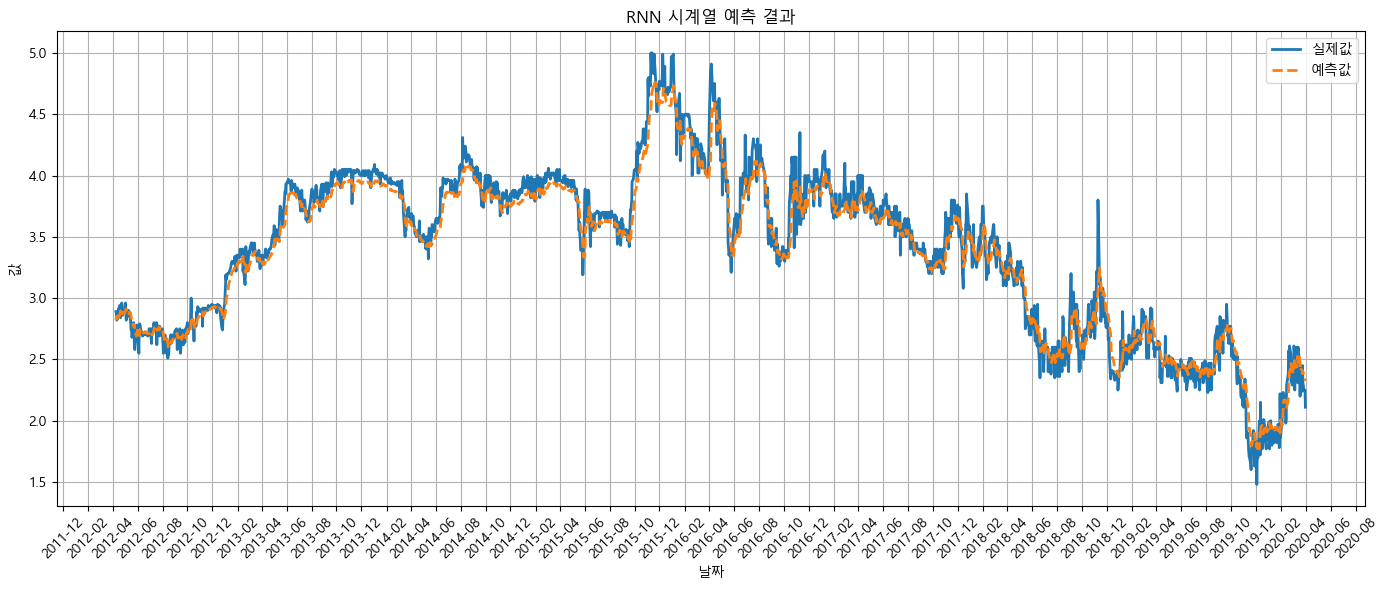

In [9]:
# 8. 시각화
plt.figure(figsize=(14,6))
ax = plt.gca()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))

plt.plot(test_dates, y_actual, label='실제값', linewidth=2)
plt.plot(test_dates, predicted, '--', label='예측값', linewidth=2)
plt.title('RNN 시계열 예측 결과')
plt.xlabel('날짜')
plt.ylabel('값')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


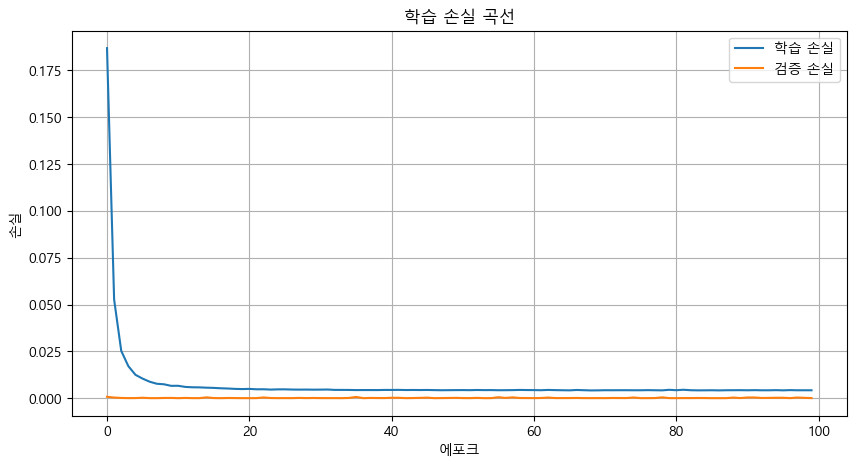

In [10]:
# 9. 학습 곡선
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='학습 손실')
plt.plot(history.history['val_loss'], label='검증 손실')
plt.title('학습 손실 곡선')
plt.xlabel('에포크')
plt.ylabel('손실')
plt.legend()
plt.grid(True)
plt.show()


In [11]:
# 10. 결과 출력
print("\n최근 5일 예측 성능:")
print("실제값:", y_actual[-5:].flatten().round(2))
print("예측값:", predicted[-5:].flatten().round(2))



최근 5일 예측 성능:
실제값: [2.3  2.29 2.25 2.25 2.11]
예측값: [2.4  2.39 2.36 2.34 2.33]
